## 안전 운전자 예측
### 8.1 경진대회 이해
- https://www.kaggle.com/competitions/porto-seguro-safe-driver-prediction
- 경진대회명 : 포르투 세그로 안전 운전자 예측 경진대회
- 미션 : 포르투 세구로 보험사에서 제공한 고객 데이터를 활용해 운전자가 보험을 청구할 확률을 예측
- 문제 유형 : 이진분류
- 평가지표 : 정규화된 지니계수
- 결측값은 -1로 기록
- 타깃값은 0 또는 1, 값이 0이면 운전자가 보험금을 청구하지 않는다는 뜻, 1이면 청구한다는 뜻

### 8.2 탐색적 데이터 분석

#### 8.2.1 데이터 불러오기

In [2]:
import pandas as pd

data_path = 'C:/Users/hyebin.hyebin/Desktop/python/kaggle_dataset/porto-seguro-safe-driver-prediction/'

train = pd.read_csv(data_path + 'train.csv', index_col = 'id')
test = pd.read_csv(data_path + 'test.csv', index_col = 'id')
submission = pd.read_csv(data_path + 'sample_submission.csv', index_col = 'id')

In [27]:
train.shape, test.shape

((595212, 58), (892816, 57))

In [28]:
train.head()

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
id,,,,,,,,,,,,,,,,,,,,,
7,0,2,2,5,1,0,0,1,0,0,...,9,1,5,8,0,1,1,0,0,1
9,0,1,1,7,0,0,0,0,1,0,...,3,1,1,9,0,1,1,0,1,0
13,0,5,4,9,1,0,0,0,1,0,...,4,2,7,7,0,1,1,0,1,0
16,0,0,1,2,0,0,1,0,0,0,...,2,2,4,9,0,0,0,0,0,0
17,0,0,2,0,1,0,1,0,0,0,...,3,1,1,3,0,0,0,1,1,0


In [29]:
test.head()

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
id,,,,,,,,,,,,,,,,,,,,,
0,0,1,8,1,0,0,1,0,0,0,...,1,1,1,12,0,1,1,0,0,1
1,4,2,5,1,0,0,0,0,1,0,...,2,0,3,10,0,0,1,1,0,1
2,5,1,3,0,0,0,0,0,1,0,...,4,0,2,4,0,0,0,0,0,0
3,0,1,6,0,0,1,0,0,0,0,...,5,1,0,5,1,0,1,0,0,0
4,5,1,7,0,0,0,0,0,1,0,...,4,0,0,4,0,1,1,0,0,1


In [30]:
submission.head()

,target
id,
0,0.0364
1,0.0364
2,0.0364
3,0.0364
4,0.0364


In [31]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 595212 entries, 7 to 1488027
Data columns (total 58 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   target          595212 non-null  int64  
 1   ps_ind_01       595212 non-null  int64  
 2   ps_ind_02_cat   595212 non-null  int64  
 3   ps_ind_03       595212 non-null  int64  
 4   ps_ind_04_cat   595212 non-null  int64  
 5   ps_ind_05_cat   595212 non-null  int64  
 6   ps_ind_06_bin   595212 non-null  int64  
 7   ps_ind_07_bin   595212 non-null  int64  
 8   ps_ind_08_bin   595212 non-null  int64  
 9   ps_ind_09_bin   595212 non-null  int64  
 10  ps_ind_10_bin   595212 non-null  int64  
 11  ps_ind_11_bin   595212 non-null  int64  
 12  ps_ind_12_bin   595212 non-null  int64  
 13  ps_ind_13_bin   595212 non-null  int64  
 14  ps_ind_14       595212 non-null  int64  
 15  ps_ind_15       595212 non-null  int64  
 16  ps_ind_16_bin   595212 non-null  int64  
 17  ps_ind_17_bin 

- 피처명 형식 : ps_[분류]\_[분류별 일련번호]_[데이터 종류]
- 분류
    - ind
    - reg
    - cal
    - calc
- 데이터 종류
    - bin : 이진형 
    - cat : 명목형
    - 이외에는 연속형, 순서형

In [32]:
# conda install missingno

<Axes: >

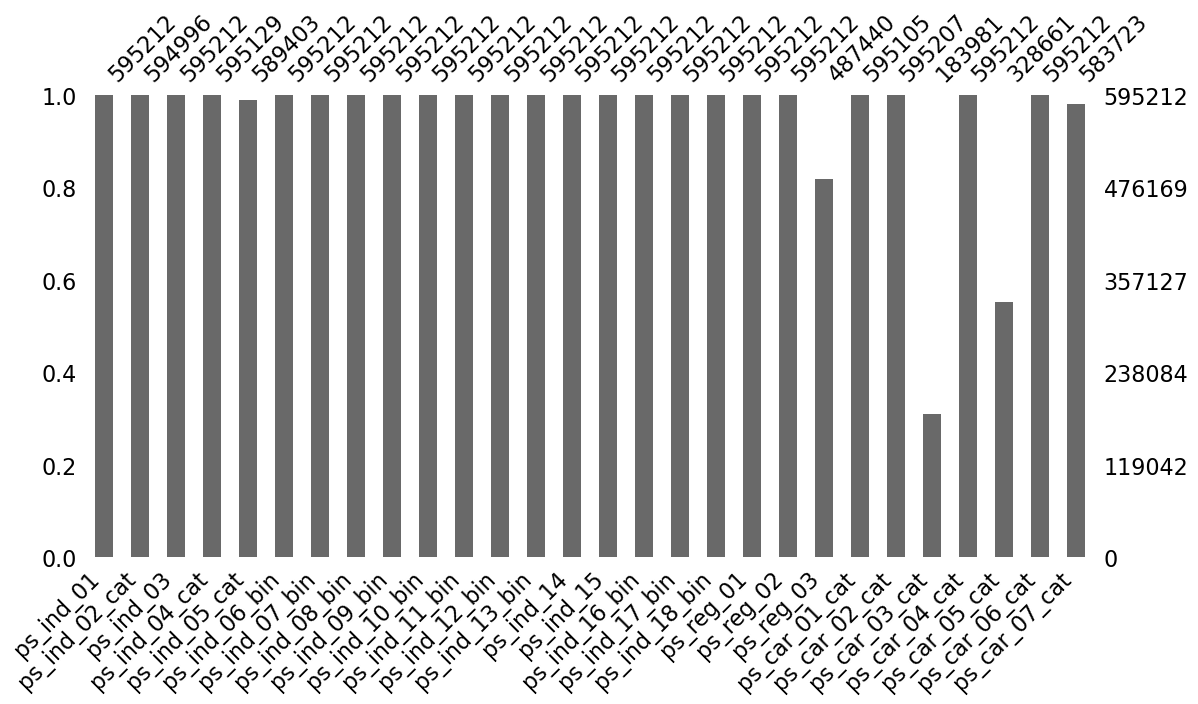

In [2]:
import numpy as np
import missingno as msno # 결측값을 시각화해주는 패키지

train_copy = train.copy().replace(-1, np.NaN)

# 처음 ~ 29개 피처만 시각화
msno.bar(df = train_copy.iloc[:, 1:29], figsize = (13, 6))

- ps_reg_03, ps_car_03_cat, ps_car_05_cat 피처에 결측값이 많음

<Axes: >

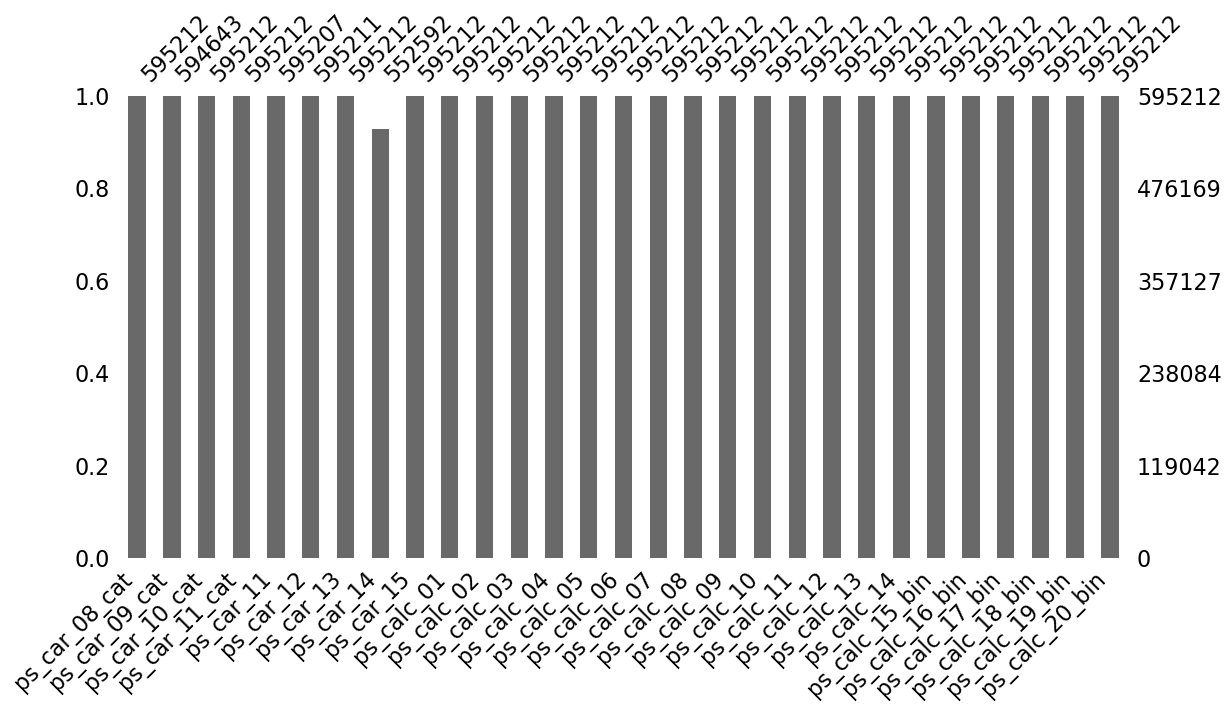

In [9]:
msno.bar(df = train_copy.iloc[:, 29:], figsize = (13, 6))

- ps_car_14 피처에만 결측값이 조금 있고, 나머지 피처에는 결측값이 거의 없음

<Axes: >

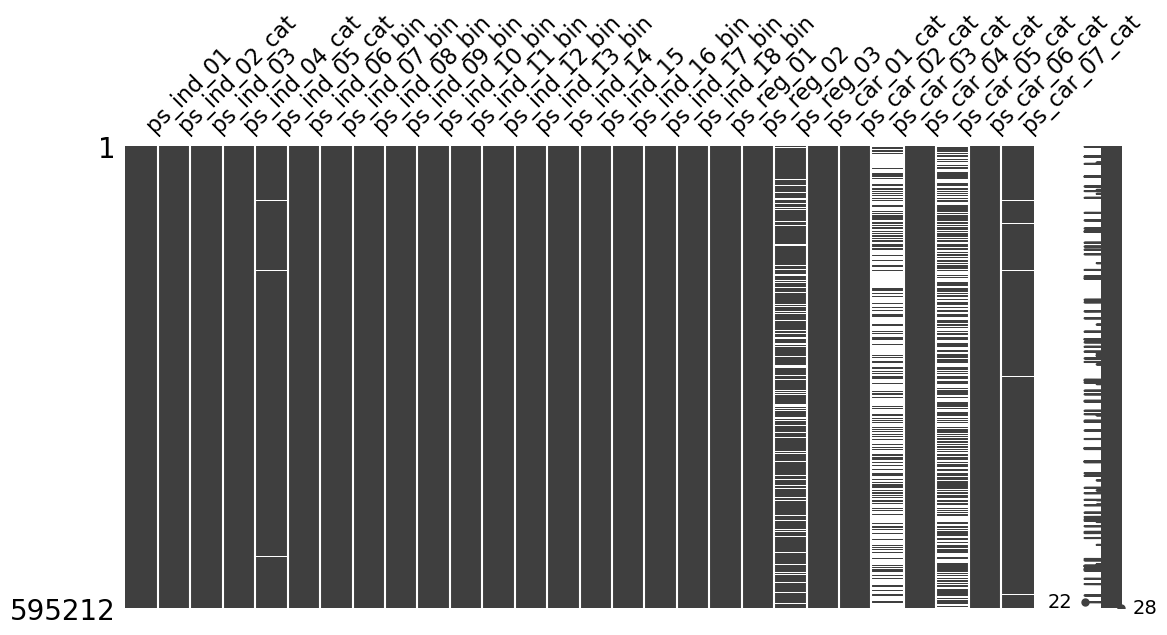

In [10]:
msno.matrix(df = train_copy.iloc[:, 1:29], figsize = (13, 6))

- 제일 오른쪽 막대는 결측값의 상대적인 분포를 보여줌
- 왼쪽에 표시된 22는 결측값이 없는 열 개수를, 오른쪽의 28은 전체 열 개수를 뜻함

##### 피처 요약표

In [3]:
def resumetable(df):
    print(f'데이터셋 형상 : {df.shape}')
    summary = pd.DataFrame(df.dtypes, columns = ['데이터 타입'])
    summary['결측값 개수'] = (df == -1).sum().values
    summary['고윳값 개수'] = df.nunique().values
    summary['데이터 종류'] = None
    for col in df.columns:
        if 'bin' in col or col == 'target':
            summary.loc[col, '데이터 종류'] = '이진형'
        elif 'cat' in col:
            summary.loc[col, '데이터 종류'] = '명목형'
        elif df[col].dtype == 'float64':
            summary.loc[col, '데이터 종류'] = '연속형'
        elif df[col].dtype == 'int64':
            summary.loc[col, '데이터 종류'] = '순서형'
    
    return summary

In [4]:
summary = resumetable(train)
summary

데이터셋 형상 : (595212, 58)


,데이터 타입,결측값 개수,고윳값 개수,데이터 종류
target,int64,0,2,이진형
ps_ind_01,int64,0,8,순서형
ps_ind_02_cat,int64,216,5,명목형
ps_ind_03,int64,0,12,순서형
ps_ind_04_cat,int64,83,3,명목형
ps_ind_05_cat,int64,5809,8,명목형
ps_ind_06_bin,int64,0,2,이진형
ps_ind_07_bin,int64,0,2,이진형
ps_ind_08_bin,int64,0,2,이진형
ps_ind_09_bin,int64,0,2,이진형


In [13]:
summary[summary['데이터 종류'] == '명목형'].index

Index(['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat',
       'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat',
       'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat',
       'ps_car_10_cat', 'ps_car_11_cat'],
      dtype='object')

In [14]:
summary[summary['데이터 타입'] == 'float64'].index

Index(['ps_reg_01', 'ps_reg_02', 'ps_reg_03', 'ps_car_12', 'ps_car_13',
       'ps_car_14', 'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03'],
      dtype='object')

#### 8.2.2 데이터 시각화

In [3]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

##### 타깃값 분포

In [6]:
def write_percent(ax, total_size):
    '''도형 객체를 순회하며 막대 상단에 타깃값 비율 표시'''
    for patch in ax.patches:
        height = patch.get_height()         # 도형 높이(데이터 개수)
        width = patch.get_width()           # 도형 너비
        left_coord = patch.get_x()          # 도형 왼쪽 테두리의 x축 위치
        percent = height / total_size * 100 # 타깃값 비율

    # (x, y) 좌표에 텍스트 입력 
        ax.text(x = left_coord + width / 2.0,    # x축 위치
                y = height + total_size * 0.001, # y축 위치
                s = f'{percent:1.1f}%',          # 입력 텍스트
                ha = 'center'                    # 가운데 정렬
            )

Text(0.5, 1.0, 'Target Distribution')

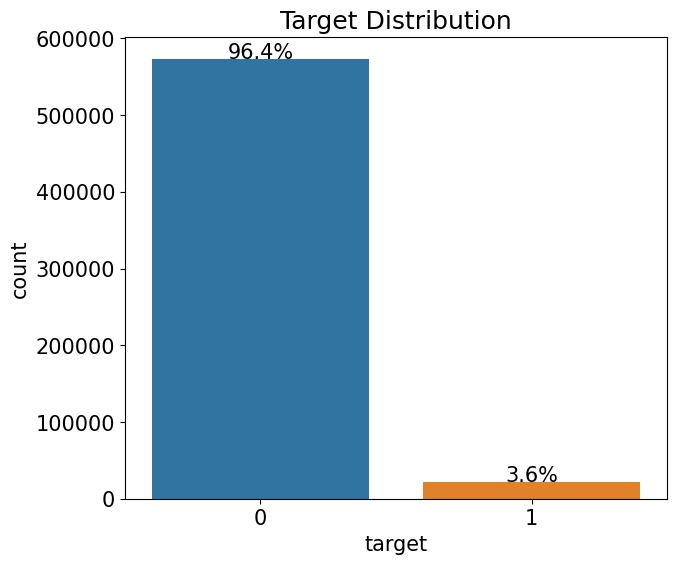

In [17]:
mpl.rc('font', size = 15)
plt.figure(figsize = (7, 6))

ax = sns.countplot(x = 'target', data = train)
write_percent(ax, len(train))
ax.set_title('Target Distribution')

- 타깃값이 불균형하므로 비율이 작은 타깃값 1을 잘 예측하는 것이 중요
- 각 피처의 고윳값 별 타깃값 1의 비율 확인 필요
- 고윳값 별 타깃값 1의 비율이 충분히 차이가 나고 신뢰구간도 작은 피처여야 모델링에 도움이 됨. 이외에는 제거하는 것이 좋음

##### 이진 피처

In [7]:
import matplotlib.gridspec as gridspec

def plot_target_ratio_by_features(df, features, num_rows, num_cols, size = (12, 18)):
    mpl.rc('font', size = 9)
    plt.figure(figsize = size)
    grid = gridspec.GridSpec(num_rows, num_cols) # 서브플롯 배치
    plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

    for idx, feature in enumerate(features):
        ax = plt.subplot(grid[idx])
        sns.barplot(x = feature, y = 'target', data = df, palette = 'Set2', ax = ax)

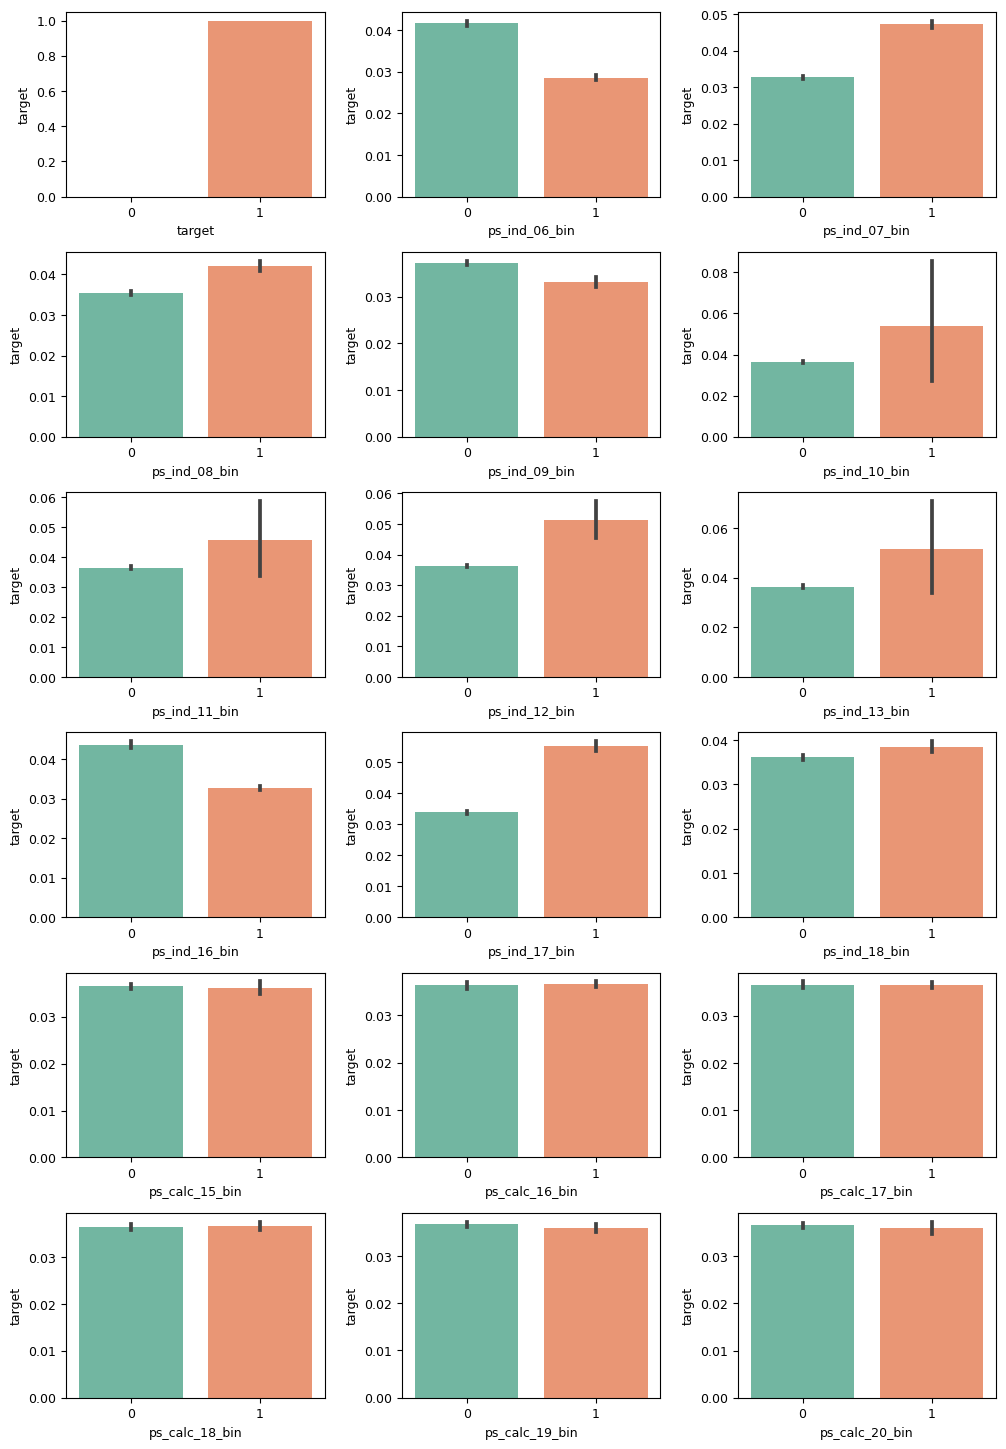

In [19]:
bin_features = summary[summary['데이터 종류'] == '이진형'].index

plot_target_ratio_by_features(train, bin_features, 6, 3)

- 6~9번 subplot - ps_ind_10_bin ~ ps_ind_13_bin : 신뢰구간이 넓어 통계적 유효성이 떨어짐
- 13~18번 subplot - ps_calc_15_bin ~ ps_calc_20_bin : 고윳값 별 타깃값 비율 차이가 없어 타깃값 예측력이 없음

##### 명목형 피처

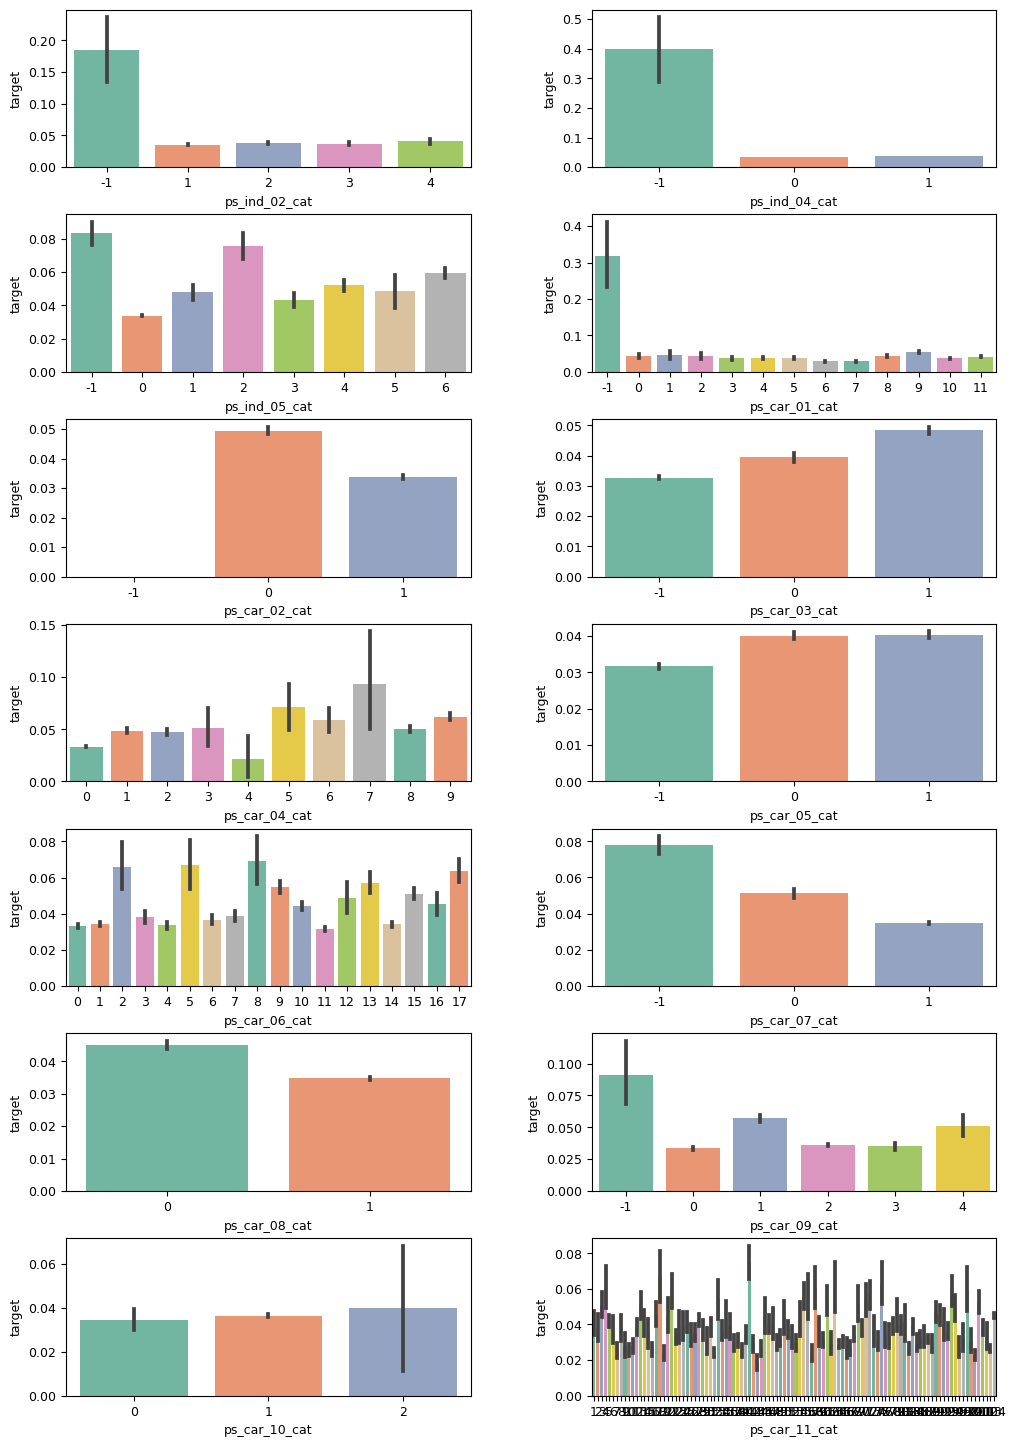

In [20]:
nom_features = summary[summary['데이터 종류'] == '명목형'].index

plot_target_ratio_by_features(train, nom_features, 7, 2)

- 결측값 자체에 타깃값 예측력이 있다면 고윳값으로 간주(결측값 처리 x)
- 명목형 피처는 모두 모델링에 이용

##### 순서형 피처

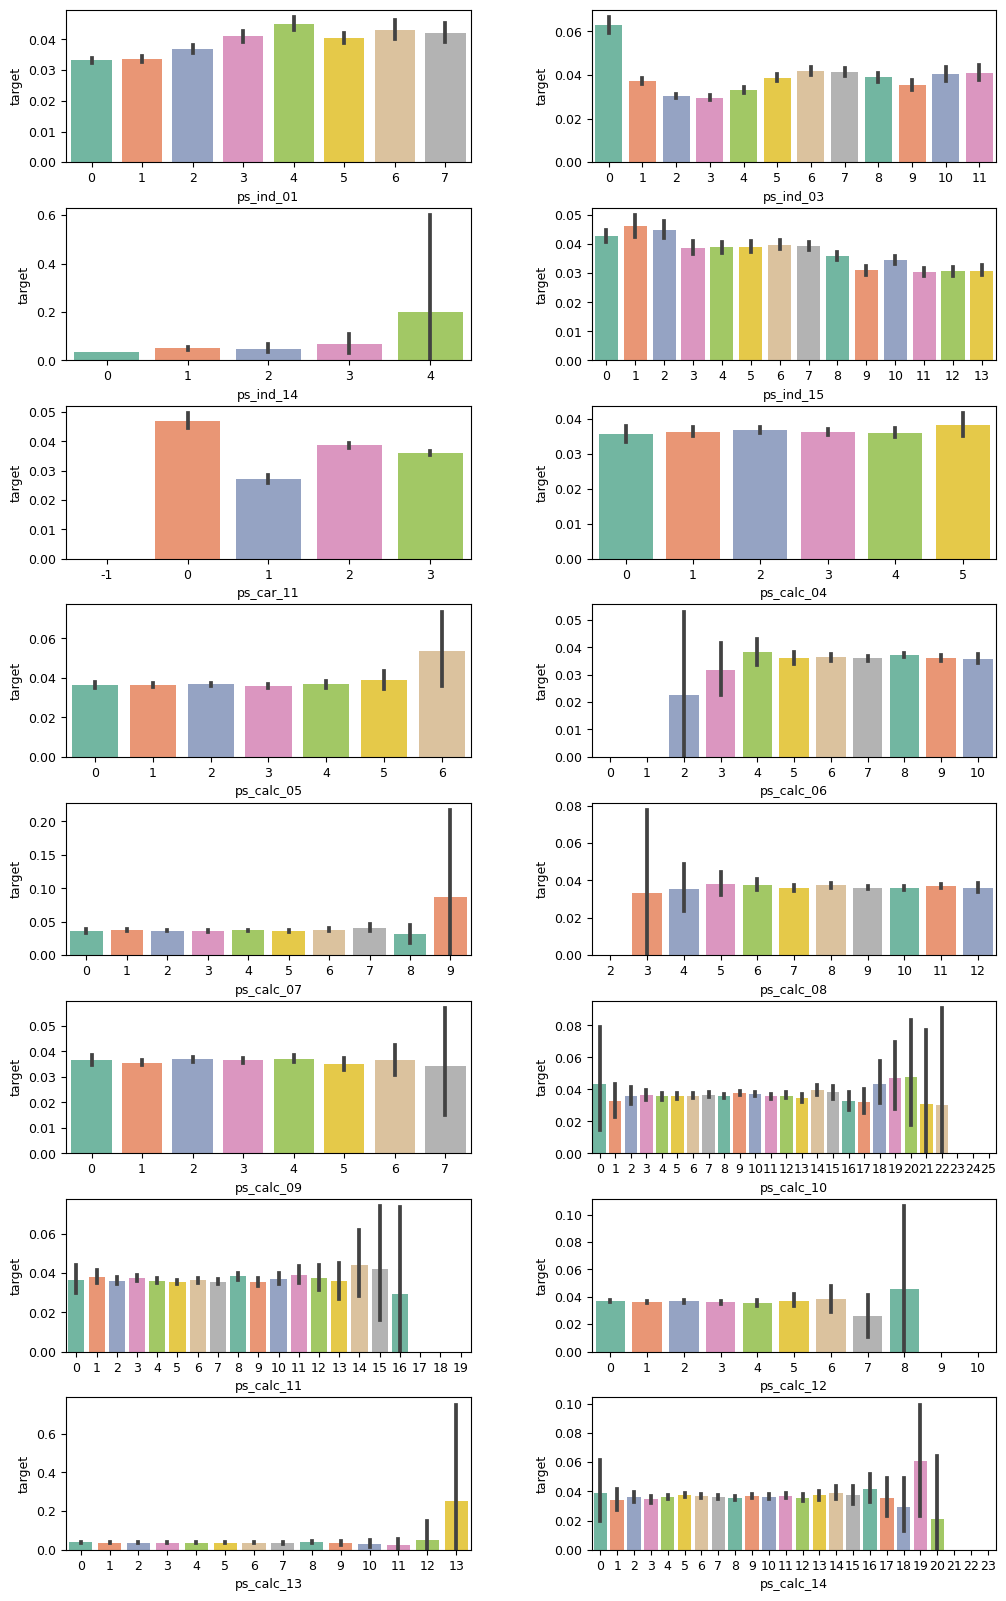

In [21]:
ord_features = summary[summary['데이터 종류'] == '순서형'].index
plot_target_ratio_by_features(train, ord_features,  8, 2, (12, 20))

- ps_ind_14 : 타깃값 비율의 신뢰구간이 넓어 통계적 유효성이 떨어져 피처 제거
- ps_calc_04 ~ ps_calc_14 : 고윳값 별 타깃값 비율 차이가 없음. 타깃값 비율이 다르더라도 신뢰구간이 넓어 통계적 유효성이 떨어짐. 피처 제거

##### 연속형 피처

In [8]:
pd.cut([1.0, 1.5, 2.1, 2.7, 3.5, 4.0], 3) # 3개의 구간으로 나눔, 연속형 데이터를 범주형 데이터로 바꾸는 효과가 있음


[(0.997, 2.0], (0.997, 2.0], (2.0, 3.0], (2.0, 3.0], (3.0, 4.0], (3.0, 4.0]]
Categories (3, interval[float64, right]): [(0.997, 2.0] < (2.0, 3.0] < (3.0, 4.0]]

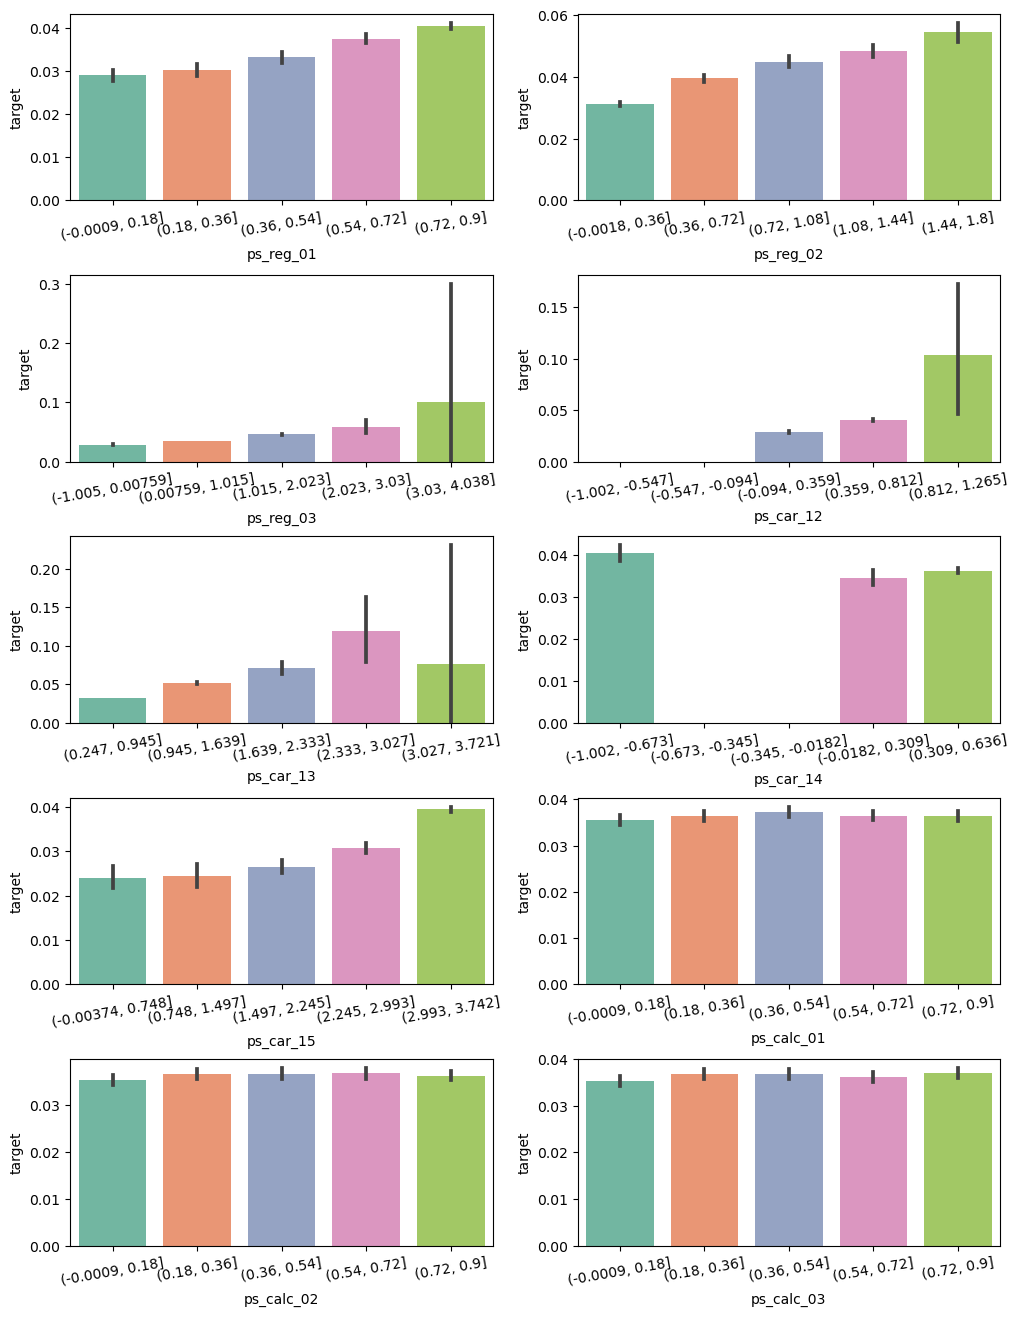

In [9]:
cont_features = summary[summary['데이터 종류'] == '연속형'].index

plt.figure(figsize = (12, 16))
grid = gridspec.GridSpec(5, 2)
plt.subplots_adjust(wspace = 0.2, hspace = 0.4)

for idx, cont_feature in enumerate(cont_features):
    train[cont_feature] = pd.cut(train[cont_feature], 5) # 연속형 피처를 5개의 구간으로 나누어 분류

    ax = plt.subplot(grid[idx])
    sns.barplot(x = cont_feature, y = 'target', data = train, palette = 'Set2', ax = ax)
    ax.tick_params(axis = 'x', labelrotation = 10)

- ps_calc_01 ~ ps_calc_03 : 구간 별 타깃값 비율 차이가 없어 피처 제거

##### 연속형 피처 2
- 상관관계가 강한 피처가 있다면 하나만 남겨두고 제외해도 예측력이 비슷
- 피어슨 상관계수가 0.8 이상이라면 아주 강한 상관관계가 있다고 보고 제거를 고려할 수 있음

In [10]:
train_copy = train_copy.dropna()

<Axes: >

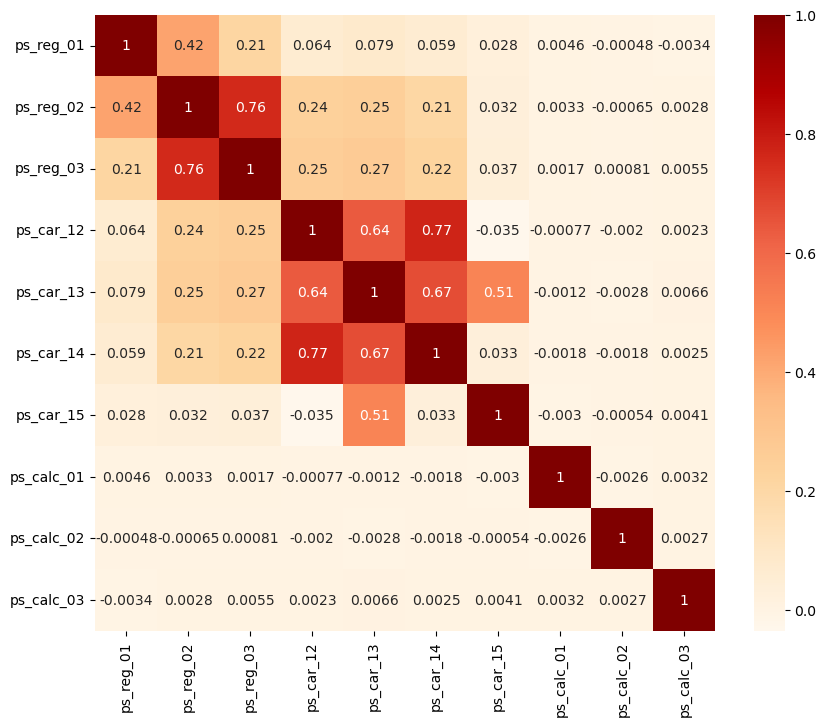

In [12]:
plt.figure(figsize = (10, 8))
cont_corr = train_copy[cont_features].corr()
sns.heatmap(cont_corr, annot = True, cmap = 'OrRd')

- 가장 강한 상관관계를 보이는 피처 : ps_car_12와 ps_car_14 -> ps_car_14 제거 고려

### 8.3 베이스라인 모델
- LightGBM : 마이크로소프트가 개발한 모델로, 빠르면서 성능이 좋음
- 지금까지와 다른 점은 훈련과 예측 과정이 동시에 이루어짐

In [15]:
import pandas as pd

data_path = 'C:/Users/hyebin.hyebin/Desktop/python/kaggle_dataset/porto-seguro-safe-driver-prediction/'

train = pd.read_csv(data_path + 'train.csv', index_col = 'id')
test = pd.read_csv(data_path + 'test.csv', index_col = 'id')
submission = pd.read_csv(data_path + 'sample_submission.csv', index_col = 'id')

#### 8.3.1 피처 엔지니어링
##### 데이터 합치기

In [16]:
all_data = pd.concat([train, test], ignore_index = True)
all_data = all_data.drop('target', axis = 1)

In [17]:
all_features = all_data.columns 
all_features

Index(['ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03', 'ps_ind_04_cat',
       'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin',
       'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin',
       'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15', 'ps_ind_16_bin',
       'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01', 'ps_reg_02', 'ps_reg_03',
       'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat',
       'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat',
       'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat', 'ps_car_11',
       'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15', 'ps_calc_01',
       'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06',
       'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11',
       'ps_calc_12', 'ps_calc_13', 'ps_calc_14', 'ps_calc_15_bin',
       'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin',
       'ps_calc_20_bin'],
      dtype='obj

##### 명목형 피처 원-핫 인코딩

In [18]:
from sklearn.preprocessing import OneHotEncoder

cat_features = [feature for feature in all_features if 'cat' in feature]

onehot_encoder = OneHotEncoder()
encoded_cat_matrix = onehot_encoder.fit_transform(all_data[cat_features])
encoded_cat_matrix

<1488028x184 sparse matrix of type '<class 'numpy.float64'>'
	with 20832392 stored elements in Compressed Sparse Row format>

##### 필요 없는 피처 제거

In [19]:
drop_features = ['ps_ind_14', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_car_14']
remaining_features = [feature for feature in all_features 
                                  if ('cat' not in feature and 
                                      'calc' not in feature and 
                                      feature not in drop_features)]

In [20]:
from scipy import sparse

all_data_sprs = sparse.hstack([sparse.csr_matrix(all_data[remaining_features]), encoded_cat_matrix], format = 'csr')

##### 데이터 나누기

In [21]:
num_train = len(train)

X = all_data_sprs[:num_train]
X_test = all_data_sprs[num_train:]

y = train['target'].values

#### 8.3.2 평가지표 계산 함수 작성
##### 지니계수란
- 경제학에서 소득 불평등 정도를 나타내는 지표 
- 지니계수가 작을수록 소득 수준이 평등하고, 클수록 불평등함을 의미
- 지니계수는 로렌츠 곡선을 이용해 계산하는데, 로렌츠곡선은 모든 경제인구를 소득 순서대로 나열한 후 가로축은 인구 누적 비율, 세로축은 소득 누적 점유율로 설정
- 인구 누적 비율과 해당 소득 누적 점유율을 연결한 선을 로렌츠곡선이라고 함
- 지니계수는 대각선과 로렌츠곡선 사이의 넓이를 대각선 아래의 삼각형 전체 넓이로 나눈 값을 의미
- 대각선과 로렌츠곡선 사이의 영역이 좁을수록(로렌츠곡선이 대각선과 가까워질수록) 소득 수준은 평등

##### 정규화 지니계수 계산 함수
- 정규화 지니계수는 값이 0에 가까울수록 성능이 나쁘고, 1에 가까울수록 성능이 좋음
- 정규화 지니계수는 예측값에 대한 지니계수를 예측이 완벽할 때의 지니계수로 나눈 값을 의미

In [4]:
import numpy as np

def eval_gini(y_true, y_pred):
    # 실젯값과 예측값의 shape이 서로 같은지 확인(값이 다르면 오류 발생)
    assert y_true.shape == y_pred.shape

    n_samples = y_true.shape[0]                       # 데이터 개수
    L_mid = np.linspace(1 / n_samples, 1, n_samples)  # 대각선 값

    # 1) 예측값에 대한 지니계수
    pred_order = y_true[y_pred.argsort()] # y_pred 크기순으로 y_true 값 정렬
    L_pred = np.cumsum(pred_order) / np.sum(pred_order) # 로렌츠 곡선
    G_pred = np.sum(L_mid - L_pred) # 예측값에 대한 지니계수

    # 2) 예측이 완벽할 때 지니계수
    true_order = y_true[y_true.argsort()] # y_true 크기순으로 y_true 값 정렬
    L_true = np.cumsum(true_order) / np.sum(true_order)
    G_true = np.sum(L_mid - L_true)

    # 정규화된 지니계수
    return G_pred / G_true

In [23]:
np.linspace(1/5, 1, 5) 

array([0.2, 0.4, 0.6, 0.8, 1. ])

In [5]:
# LightBGM용 gini() 함수
def gini(preds, dtrain):
    labels = dtrain.get_label() # 데이터셋 타깃값 반환
    return 'gini', eval_gini(labels, preds), True # 평가지표 이름, 평가 점수, 평가 점수가 높을수록 좋은지의 여부

#### 8.3.3 모델 훈련 및 성능 검증
##### OOF 예측 방식
- OOF(Out of Fold prediction) : K 폴드 교차 검증을 수행하면서 각 폴드마다 테스트 데이터로 예측하는 방식
- 1\) 훈련 데이터로 모델을 훈련 -> 2) 검증 데이터로 모델 성능 측정 -> 3) 테스트 데이터로 최종 타깃 확률 예측
- OOF 예측 절차
    1. 전체 훈련 데이터를 K개 그룹으로 나눔
    2. K개 그룹 중 한 그룹은 검증 데이터, 나머지 K-1개 그룹은 훈련 데이터로 지정
    3. 훈련 데이터로 모델을 훈련
    4. 훈련된 모델을 이용해 검증 데이터로 타깃 확률을 예측하고, 전체 테스트 데이터로도 타깃 확률을 예측
    5. 검증 데이터로 구한 예측 확률과 테스트 데이터로 구한 예측 확률을 기록
    6. 검증 데이터를 다른 그룹으로 바꿔가며 2~5번 절차를 총 K번 반복
    7. K개 그룹의 검증 데이터로 예측한 확률을 훈련 데이터 실제 타깃값과 비교해 성능 평가점수를 계산. 이 점수로 모델 성능을 가늠 가능
    8. 테스트 데이터로 구한 K개 예측 확률의 평균을 구함. 이 값이 최종 예측 확률이며, 제출해야 하는 값
- OOF 예측 방식의 장점
    - 과대적합 방지 효과
    - 앙상블 효과가 있어 모델 성능이 좋아짐

-> 베이스라인 모델을 훈련하면서 OOF 예측도 수행

In [25]:
from sklearn.model_selection import StratifiedKFold # 층화 K 폴드 : 타깃값이 균등하게 배치되게 폴드를 나눔

folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 1991) # 5개의 폴드
params = {'objective' : 'binary', 'learning_rate' : 0.01, 'force_row_wise' : True, 'random_state' : 0}

In [26]:
# OOF 방식으로 훈련된 모델로 검증 데이터 타깃값을 예측한 확률을 담을 배열
oof_val_preds = np.zeros(X.shape[0])

# OOF 방식으로 훈련된 모델로 테스트 데이터 타깃값을 예측한 확률을 담을 배열
oof_test_preds = np.zeros(X_test.shape[0])

In [27]:
import lightgbm as lgb

# OOF 방식으로 모델 훈련, 검증, 예측
for idx, (train_idx, valid_idx) in enumerate(folds.split(X, y)):
    print('#'*40, f'폴드 {idx + 1} / 폴드 {folds.n_splits}', '#'*40)

    # 훈련용 데이터, 검증용 데이터 설정
    X_train, y_train = X[train_idx], y[train_idx]
    X_valid, y_valid = X[valid_idx], y[valid_idx]

    # LightGBM 전용 데이터셋 생성
    dtrain = lgb.Dataset(X_train, y_train)
    dvalid = lgb.Dataset(X_valid, y_valid)

    # LightGBM 모델 훈련
    lgb_model = lgb.train(params = params,                # 훈련용 하이퍼파라미터
                          train_set = dtrain,             # 훈련 데이터셋
                          num_boost_round = 1000,         # 부스팅 반복 횟수
                          valid_sets = dvalid,            # 검증 데이터셋
                          feval = gini,                   # 검증용 평가지표
                          early_stopping_rounds = 100,    # 조기종료 조건
                          verbose_eval = 100)             # 100번째마다 점수 출력
    
    # 테스트 데이터를 활용해 OOF를 예측
    oof_test_preds += lgb_model.predict(X_test) / folds.n_splits
    # lightgbm은 predict 호출 시 훈련 단계에서 최고 성능을 낸 반복 횟수로 예측함
    # 500번째에서 지니계수가 최고로 높다면 조기종료 조건이 100일 때, 600 번째까지 더 높은 지니계수가 나오지 않을 시 조기종료

    # 모델 성능 평가를 위한 검증 데이터 타깃값 예측
    oof_val_preds[valid_idx] += lgb_model.predict(X_valid)
    # 훈련 및 검증 데이터는 lgb.Dataset()으로 변환해서 사용하지만, 예측용 데이터는 원본 데이터 그대로 사용

    # 검증 데이터 예측 확률에 대한 정규화 지니계수
    gini_score = eval_gini(y_valid, oof_val_preds[valid_idx])
    print(f'폴드 {idx + 1} 지니계수 : {gini_score}\n')

######################################## 폴드 1 / 폴드 5 ########################################


[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] Total Bins 1095
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 200
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036447 -> initscore=-3.274764
[LightGBM] [Info] Start training from score -3.274764
Training until validation scores don't improve for 100 rounds
[100]	valid_0's binary_logloss: 0.153354	valid_0's gini: 0.261651
[200]	valid_0's binary_logloss: 0.152426	valid_0's gini: 0.275704
[300]	valid_0's binary_logloss: 0.152023	valid_0's gini: 0.282277
[400]	valid_0's binary_logloss: 0.1518	valid_0's gini: 0.286648
[500]	valid_0's binary_logloss: 0.151713	valid_0's gini: 0.287944
[600]	valid_0's binary_logloss: 0.151672	valid_0's gini: 0.288637
[700]	valid_0's binary_logloss: 0.151659	valid_0's gini: 0.288939
Early stopping, best iteration is:
[681]	valid_0's binary_logloss: 0.151659	valid_0's gini: 0.289034
폴드 1 지니계수 : 0.2890336154188232

##########

In [28]:
print('OOF 검증 데이터 지니계수: ', eval_gini(y, oof_val_preds))

OOF 검증 데이터 지니계수:  0.2804995714877777


#### 8.3.4 예측 및 결과 제출

In [29]:
submission['target'] = oof_test_preds
submission.to_csv(data_path + 'submission1.csv')

### 8.4 성능 개선 1: LightGBM 모델

In [33]:
import pandas as pd

data_path = 'C:/Users/hyebin.hyebin/Desktop/python/kaggle_dataset/porto-seguro-safe-driver-prediction/'

train = pd.read_csv(data_path + 'train.csv', index_col = 'id')
test = pd.read_csv(data_path + 'test.csv', index_col = 'id')
submission = pd.read_csv(data_path + 'sample_submission.csv', index_col = 'id')

#### 8.4.1 피처 엔지니어링
##### 데이터 합치기

In [34]:
all_data = pd.concat([train, test], ignore_index = True)
all_data = all_data.drop('target', axis = 1)

all_features = all_data.columns

##### 명목형 피처 원-핫 인코딩

In [35]:
from sklearn.preprocessing import OneHotEncoder

cat_features = [feature for feature in all_features if 'cat' in feature]

onehot_encoder = OneHotEncoder()
encoded_cat_matrix = onehot_encoder.fit_transform(all_data[cat_features])

##### 파생 피처 추가
- 한 데이터가 가진 결측값 개수를 파생 피처로 만듦

In [36]:
all_data['num_missing'] = (all_data == -1).sum(axis = 1)

In [37]:
# 명목형 피처, calc 분류의 피처를 제외한 피처
remaining_features = [feature for feature in all_features if ('cat' not in feature and 'calc' not in feature)]

# num_missing을 remainig_features에 추가
remaining_features.append('num_missing')

- 모든 ind 분류의 피처 값을 연결해 새로운 피처를 만듦
- 이를 이용해 명목형 피처의 고윳값 별 개수 피처를 생성


In [38]:
# 분류가 ind인 피처
ind_features = [feature for feature in all_features if 'ind' in feature]

is_first_feature = True
for ind_feature in ind_features:
    if is_first_feature:
        all_data['mix_ind'] = all_data[ind_feature].astype(str) + '_'
        is_first_feature = False
    else:
        all_data['mix_ind'] += all_data[ind_feature].astype(str) + '_'

In [39]:
all_data['mix_ind']

0          2_2_5_1_0_0_1_0_0_0_0_0_0_0_11_0_1_0_
1           1_1_7_0_0_0_0_1_0_0_0_0_0_0_3_0_0_1_
2          5_4_9_1_0_0_0_1_0_0_0_0_0_0_12_1_0_0_
3           0_1_2_0_0_1_0_0_0_0_0_0_0_0_8_1_0_0_
4           0_2_0_1_0_1_0_0_0_0_0_0_0_0_9_1_0_0_
                           ...                  
1488023     0_1_6_0_0_0_1_0_0_0_0_0_0_0_2_0_0_1_
1488024    5_3_5_1_0_0_0_1_0_0_0_0_0_0_11_1_0_0_
1488025     0_1_5_0_0_1_0_0_0_0_0_0_0_0_5_0_0_1_
1488026    6_1_5_1_0_0_0_0_1_0_0_0_0_0_13_1_0_0_
1488027    7_1_4_1_0_0_0_0_1_0_0_0_0_0_12_1_0_0_
Name: mix_ind, Length: 1488028, dtype: object

In [40]:
all_data

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,...,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin,num_missing,mix_ind
0,2,2,5,1,0,0,1,0,0,0,...,5,8,0,1,1,0,0,1,1,2_2_5_1_0_0_1_0_0_0_0_0_0_0_11_0_1_0_
1,1,1,7,0,0,0,0,1,0,0,...,1,9,0,1,1,0,1,0,2,1_1_7_0_0_0_0_1_0_0_0_0_0_0_3_0_0_1_
2,5,4,9,1,0,0,0,1,0,0,...,7,7,0,1,1,0,1,0,3,5_4_9_1_0_0_0_1_0_0_0_0_0_0_12_1_0_0_
3,0,1,2,0,0,1,0,0,0,0,...,4,9,0,0,0,0,0,0,0,0_1_2_0_0_1_0_0_0_0_0_0_0_0_8_1_0_0_
4,0,2,0,1,0,1,0,0,0,0,...,1,3,0,0,0,1,1,0,2,0_2_0_1_0_1_0_0_0_0_0_0_0_0_9_1_0_0_
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1488023,0,1,6,0,0,0,1,0,0,0,...,3,4,0,1,0,0,1,0,1,0_1_6_0_0_0_1_0_0_0_0_0_0_0_2_0_0_1_
1488024,5,3,5,1,0,0,0,1,0,0,...,2,11,0,0,1,1,0,0,1,5_3_5_1_0_0_0_1_0_0_0_0_0_0_11_1_0_0_
1488025,0,1,5,0,0,1,0,0,0,0,...,2,11,0,1,1,0,0,0,2,0_1_5_0_0_1_0_0_0_0_0_0_0_0_5_0_0_1_
1488026,6,1,5,1,0,0,0,0,1,0,...,2,7,1,1,0,0,0,0,1,6_1_5_1_0_0_0_0_1_0_0_0_0_0_13_1_0_0_


- 명목형 피처의 고윳값 별 개수를 새로운 피처로 추가

In [41]:
all_data['ps_ind_02_cat'].value_counts().to_dict()

{1: 1079327, 2: 309747, 3: 70172, 4: 28259, -1: 523}

In [42]:
cat_count_features = []
for feature in cat_features + ['mix_ind']:
    val_counts_dict = all_data[feature].value_counts().to_dict()
    all_data[f'{feature}_count'] = all_data[feature].apply(lambda x: val_counts_dict[x])
    cat_count_features.append(f'{feature}_count')

In [43]:
all_data

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,...,ps_car_03_cat_count,ps_car_04_cat_count,ps_car_05_cat_count,ps_car_06_cat_count,ps_car_07_cat_count,ps_car_08_cat_count,ps_car_09_cat_count,ps_car_10_cat_count,ps_car_11_cat_count,mix_ind_count
0,2,2,5,1,0,0,1,0,0,0,...,1028142,1241334,431560,77845,1383070,249663,486510,1475460,18326,6
1,1,1,7,0,0,0,0,1,0,0,...,1028142,1241334,666910,329890,1383070,1238365,883326,1475460,12535,36
2,5,4,9,1,0,0,0,1,0,0,...,1028142,1241334,666910,147714,1383070,1238365,883326,1475460,19943,24
3,0,1,2,0,0,1,0,0,0,0,...,183044,1241334,431560,329890,1383070,1238365,36798,1475460,212989,2784
4,0,2,0,1,0,1,0,0,0,0,...,1028142,1241334,666910,147714,1383070,1238365,883326,1475460,26161,258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1488023,0,1,6,0,0,0,1,0,0,0,...,1028142,51211,389558,147714,76138,1238365,486510,1475460,3066,107
1488024,5,3,5,1,0,0,0,1,0,0,...,1028142,1241334,389558,83563,1383070,249663,486510,1475460,23506,26
1488025,0,1,5,0,0,1,0,0,0,0,...,1028142,1241334,666910,329890,1383070,249663,72947,1475460,9725,258
1488026,6,1,5,1,0,0,0,0,1,0,...,1028142,1241334,431560,83563,1383070,1238365,486510,1475460,31344,37


##### 필요 없는 피처 제거

In [44]:
from scipy import sparse

drop_features = ['ps_ind_14', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_car_14']

# remaining_features, cat_count_features에서 drop_features를 제거한 데이터
all_data_remainig = all_data[remaining_features + cat_count_features].drop(drop_features, axis = 1)

# 데이터 합치기
all_data_sprs = sparse.hstack([sparse.csr_matrix(all_data_remainig), encoded_cat_matrix], format = 'csr')

##### 데이터 나누기

In [45]:
num_train = len(train)

X = all_data_sprs[:num_train]
X_test = all_data_sprs[num_train:]

y = train['target'].values

#### 8.4.2 하이퍼파라미터 최적화
##### 데이터셋 준비
- 베이지안 최적화를 위한 데이터셋 생성

In [61]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, random_state = 0)

bayes_dtrain = lgb.Dataset(X_train, y_train)
bayes_dvalid = lgb.Dataset(X_valid, y_valid)

##### 하이퍼파라미터 범위 설정
- 하이퍼파라미터 범위를 점점 좁히는 방법 
    - 처음에는 범위를 0~1 전체로 잡고 베이지안 최적화를 수행한 후, 
    - 0.5를 최적 하이퍼파라미터로 찾으면, 
    - 다시 0.5 주변으로 범위를 잡음
- 상위권 캐글러가 설정한 하이퍼파라미터를 참고하는 방법(공유된 코드 참고)

In [62]:
# 베이지안 최적화를 위한 하이퍼파라미터 범위
param_bounds = {'num_leaves': (30, 40),
                'lambda_l1': (0.7, 0.9),
                'lambda_l2': (0.9, 1), 
                'feature_fraction': (0.6, 0.7), 
                'bagging_fraction': (0.6, 0.9), 
                'min_child_samples': (6, 10), 
                'min_child_weight': (10, 40)}

# 값이 고정된 하이퍼파라미터
fixed_params = {'objective': 'binary',
                'learning_rate': 0.005, 
                'bagging_freq': 1, 
                'force_row_wise': True, 
                'random_state': 1991}

##### (베이지안 최적화용) 평가지표 계산 함수 작성

In [64]:
def eval_function(num_leaves, lambda_l1, lambda_l2, feature_fraction, bagging_fraction, min_child_samples, min_child_weight):
    '''최적화하려는 평가지표(지니계수) 계산 함수'''

    # 베이지안 최적화를 수행할 하이퍼파라미터
    params = {'num_leaves': int(round(num_leaves)),
              'lambda_l1': lambda_l1,
              'lambda_l2': lambda_l2,
              'feature_fraction': feature_fraction,
              'bagging_fraction': bagging_fraction,
              'min_child_samples': int(round(min_child_samples)),
              'min_child_weight': min_child_weight,
              'feature_pre_filter': False}
    
    # 고정된 하이퍼파라미터도 추가
    params.update(fixed_params)

    print('하이퍼파라미터: ', params)

    # LightGBM 모델 훈련
    lgb_model = lgb.train(params = params,
                          train_set = bayes_dtrain, 
                          num_boost_round = 2500, 
                          valid_sets = bayes_dvalid,
                          feval = gini,
                          early_stopping_rounds = 300, 
                          verbose_eval = False)
    
    # 검증 데이터로 예측 수행
    preds = lgb_model.predict(X_valid)

    # 지니계수 계산
    gini_score = eval_gini(y_valid, preds)
    print(f'지니계수: {gini_score}\n')

    return gini_score

##### 최적화 수행

In [65]:
from bayes_opt import BayesianOptimization

# 베이지안 최적화 객체 생성
optimizer = BayesianOptimization(f = eval_function,        # 평가지표 계산 함수
                                 pbounds = param_bounds,   # 하이퍼파라미터 범위
                                 random_state = 0)

In [66]:
# 베이지안 최적화 수행
optimizer.maximize(init_points = 3, n_iter = 6)
# init_points : 무작위로 하이퍼파라미터를 탐색하는 횟수
# n_iter : 베이지안 최적화 반복 횟수 
# 베이지안 최적화는 init_points와 n_iter를 더한 값 만큼 반복

|   iter    |  target   | baggin... | featur... | lambda_l1 | lambda_l2 | min_ch... | min_ch... | num_le... |
-------------------------------------------------------------------------------------------------------------
하이퍼파라미터:  {'num_leaves': 34, 'lambda_l1': 0.8205526752143287, 'lambda_l2': 0.9544883182996897, 'feature_fraction': 0.6715189366372419, 'bagging_fraction': 0.7646440511781974, 'min_child_samples': 8, 'min_child_weight': 29.376823391999682, 'feature_pre_filter': False, 'objective': 'binary', 'learning_rate': 0.005, 'bagging_freq': 1, 'force_row_wise': True, 'random_state': 1991}
[LightGBM] [Info] Number of positive: 17383, number of negative: 458786
[LightGBM] [Info] Total Bins 1555
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 217
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036506 -> initscore=-3.273091
[LightGBM] [Info] Start training from score -3.273091
지니계수: 0.2855811556220905

|  1        |  0.2856   |  0.7646   |  

##### 결과 확인

In [67]:
# 평가함수 점수가 최대일 때 하이퍼파라미터
max_params = optimizer.max['params']
max_params

{'bagging_fraction': 0.6213108174593661,
 'feature_fraction': 0.608712929970154,
 'lambda_l1': 0.7040436794880651,
 'lambda_l2': 0.9832619845547939,
 'min_child_samples': 9.112627003799401,
 'min_child_weight': 36.10036444740457,
 'num_leaves': 39.78618342232764}

In [68]:
# 정수형 하이퍼파라미터 변환
max_params['num_leaves'] = int(round(max_params['num_leaves']))
max_params['min_child_samples'] = int(round(max_params['min_child_samples']))

In [69]:
# 값이 고정된 하이퍼파라미터 추가
max_params.update(fixed_params)

#### 8.4.3 모델 훈련 및 성능 검증

In [70]:
from sklearn.model_selection import StratifiedKFold

folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 1991)

oof_val_preds = np.zeros(X.shape[0])
oof_test_preds = np.zeros(X_test.shape[0])

for idx, (train_idx, valid_idx) in enumerate(folds.split(X, y)):
    print('#'*40, f'폴드 {idx+1} / 폴드 {folds.n_splits}', '#'*40)

    X_train, y_train = X[train_idx], y[train_idx]
    X_valid, y_valid = X[valid_idx], y[valid_idx]

    dtrain = lgb.Dataset(X_train, y_train)
    dvalid = lgb.Dataset(X_valid, y_valid)

    lgb_model = lgb.train(params = max_params, 
                          train_set = dtrain,
                          num_boost_round = 2500,
                          valid_sets = dvalid,
                          feval = gini,
                          early_stopping_rounds = 300, 
                          verbose_eval = 100)
    
    oof_test_preds += lgb_model.predict(X_test)/folds.n_splits
    oof_val_preds[valid_idx] += lgb_model.predict(X_valid)

    gini_score = eval_gini(y_valid, oof_val_preds[valid_idx])
    print(f'폴드 {idx+1} 지니계수 : {gini_score}\n')

######################################## 폴드 1 / 폴드 5 ########################################
[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] Total Bins 1554
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 216
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036447 -> initscore=-3.274764
[LightGBM] [Info] Start training from score -3.274764
Training until validation scores don't improve for 300 rounds
[100]	valid_0's binary_logloss: 0.154239	valid_0's gini: 0.270944
[200]	valid_0's binary_logloss: 0.153176	valid_0's gini: 0.275764
[300]	valid_0's binary_logloss: 0.152584	valid_0's gini: 0.279501
[400]	valid_0's binary_logloss: 0.152222	valid_0's gini: 0.282893
[500]	valid_0's binary_logloss: 0.151986	valid_0's gini: 0.286058
[600]	valid_0's binary_logloss: 0.151824	valid_0's gini: 0.288805
[700]	valid_0's binary_logloss: 0.151712	valid_0's gini: 0.290719
[800]	valid_0's binary_logloss: 0.151622	valid_

In [71]:
print('OOF 검증 데이터 지니계수 : ', eval_gini(y, oof_val_preds))

OOF 검증 데이터 지니계수 :  0.2889651000887542


#### 8.4.4 예측 및 결과 제출

In [72]:
submission['target'] = oof_test_preds
submission.to_csv(data_path + 'submission2.csv')

### 8.5 성능 개선 2: XGBoost 모델
- XGBoost 모델은 성능이 우수한 트리 기반 부스팅 알고리즘으로, 결정 트리를 병렬로 배치하는 랜덤 포레스트와 달리 직렬로 배치해 사용

#### 8.5.1 피처 엔지니어링
- LightGBM용 반환값이 3개 : 평가지표명, 평가점수, 평가점수가 높으면 좋은지 여부
- XGBoost용 지니계수 계산 함수는 반환값이 2개 : 평가지표명, 평가점수, 평가점수가 높으면 좋은지의 여부는 train 메서드에 따로 전달

In [46]:
# XGBoost용 gini() 함수
def gini(preds, dtrain):
    labels = dtrain.get_label()
    return 'gini', eval_gini(labels, preds)

#### 8.5.2 하이퍼파라미터 최적화
- 베이지안 최적화 수행

##### 데이터셋 준비

In [52]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, random_state = 0)

bayes_dtrain = xgb.DMatrix(X_train, y_train)
bayes_dvalid = xgb.DMatrix(X_valid, y_valid)

##### 하이퍼파라미터 범위 설정

In [53]:
# 베이지안 최적화를 위한 하이퍼파라미터 범위
param_bounds = {'max_depth': (4, 8),
                'subsample': (0.6, 0.9), 
                'colsample_bytree': (0.7, 1.0), 
                'min_child_weight': (5, 7), 
                'gamma': (8, 11), 
                'reg_alpha': (7, 9), 
                'reg_lambda': (1.1, 1.5), 
                'scale_pos_weight': (1.4, 1.6)}

# 값이 고정된 하이퍼파라미터
fixed_params = {'objective': 'binary:logistic', 
                'learning_rate': 0.02,
                'random_state': 1991}

##### (베이지안 최적화용) 평가지표 계산 함수 작성

In [56]:
def eval_function(max_depth, subsample, colsample_bytree, min_child_weight, reg_alpha, gamma, reg_lambda, scale_pos_weight):
    params = {'max_depth': int(round(max_depth)),
              'subsample': subsample,
              'colsample_bytree': colsample_bytree,
              'min_child_weight': min_child_weight,
              'reg_alpha': reg_alpha,
              'gamma': gamma,
              'reg_lambda': reg_lambda,
              'scale_pos_weight': scale_pos_weight}
    
    params.update(fixed_params)

    print('하이퍼파라미터 :', params)   

    # XGBoost 모델 훈련
    xgb_model = xgb.train(params = params,
                          dtrain = bayes_dtrain,
                          num_boost_round = 2000, 
                          evals = [(bayes_dvalid, 'bayes_dvalid')], # 검증용으로 훈련 데이터도 사용하고 싶다면 (bayes_dtrain, 'bayes_dtrain')도 추가하면 됨
                          maximize = True, # 평가점수(지니계수)가 클수록 좋다는 의미
                          feval = gini,
                          early_stopping_rounds = 200,
                          verbose_eval = False
                          )
    
    best_iter = xgb_model.best_iteration # 최적 반복횟수

    preds = xgb_model.predict(bayes_dvalid, iteration_range = (0, best_iter)) # LightGBM 모델과 달리 valid 데이터를 DMatrix 타입으로 전달해야 함

    gini_score = eval_gini(y_valid, preds)
    print(f'지니계수 : {gini_score}\n')

    return gini_score

##### 최적화 수행

In [59]:
from bayes_opt import BayesianOptimization

optimizer = BayesianOptimization(f = eval_function,
                                 pbounds = param_bounds,
                                 random_state = 0)

optimizer.maximize(init_points = 3, n_iter = 6)

|   iter    |  target   | colsam... |   gamma   | max_depth | min_ch... | reg_alpha | reg_la... | scale_... | subsample |
-------------------------------------------------------------------------------------------------------------------------
하이퍼파라미터 : {'max_depth': 6, 'subsample': 0.867531900234624, 'colsample_bytree': 0.8646440511781974, 'min_child_weight': 6.0897663659937935, 'reg_alpha': 7.84730959867781, 'gamma': 10.14556809911726, 'reg_lambda': 1.3583576452266626, 'scale_pos_weight': 1.4875174422525386, 'objective': 'binary:logistic', 'learning_rate': 0.02, 'random_state': 1991}
[22:53:24] WARNING: D:\bld\xgboost-split_1631904903843\work\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [ ]:
max_params = optimizer.max['params']
max_params

In [ ]:
max_params['max_depth'] = int(round(max_params['max_depth'])) # 정수형으로 변환
max_params.update(fixed_params)
max_params

#### 8.5.3 모델 훈련 및 성능 검증

In [ ]:
from sklearn.model_selection import StratifiedKFold

folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 1991)

oof_val_preds = np.zeros(X.shape[0])
oof_test_preds = np.zeros(X_test.shape[0])

for idx, (train_idx, valid_idx) in enumerate(folds.split(X, y)):
    print('#'*40, f'폴드 {idx+1} / 폴드 {folds.n_splits}', '#'*40)

    X_train, y_train = X[train_idx], y[train_idx]
    X_valid, y_valid = X[valid_idx], y[valid_idx]

    dtrain = xgb.DMatrix(X_train, y_train)
    dvalid = xgb.DMatrix(X_valid, y_valid)
    dtest = xgb.DMatrix(X_test)

    xgb_model = xgb.train(params = max_params,
                          dtrain = dtrain,
                          num_boost_round = 2000,
                          evals = [(dvalid, 'valid')],
                          maximize = True,
                          feval = gini,
                          early_stopping_rounds = 200,
                          verbose_eval = 100)
    
    best_iter = xgb_model.best_iteration

    oof_test_preds += xgb_model.predict(dtest, iteration_range = (0, best_iter)) / folds.n_splits
    oof_val_preds[valid_idx] += xgb_model.predict(dvalid, iteration_range = (0, best_iter))

    gini_score = eval_gini(y_valid, oof_val_preds[valid_idx])
    print(f'폴드 {idx+1} 지니계수 : {gini_score}')

In [ ]:
print('OOF 검증 데이터 지니계수 : ', eval_gini(y, oof_val_preds))

#### 8.5.4 예측 및 결과 제출

In [ ]:
submission['target'] = oof_test_preds
submission.to_csv(data_path + 'submission3.csv')

### 8.6 성능 개선 3: LightGBM과 XGBoost 앙상블
#### 8.6.1 앙상블 수행

In [ ]:
oof_test_preds = oof_test_preds_lgb * 0.5 + oof_test_preds_xgb * 0.5 # 가중치를 50%씩으로 줌

#### 8.6.2 예측 및 결과 제출

In [ ]:
submission['target'] = oof_test_preds
submission.to_csv(data_path + 'submission4.csv')